## Database Visualisation

---

Use this tool to produce charts and visualisations for the YouTube database.

This tool can produce visualisations for the enriched YouTube database. It can also be used to search the descriptions and tags in the database 

Note: The views are not taking into account IP address location, and so will include views from outside that market.

---

### Click in the following cell and then click run, do this once

In [1]:
# Run Me
import ipywidgets as widgets
#import squarify
import json
import os
from IPython.display import HTML, display
import pandas as pd
import numpy as np
# Treemap Ploting
import inflect
from empath import Empath
import matplotlib
import operator
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import wordnet
nltk.download('wordnet', quiet=True)


with open("config.json") as json_data_file:
    config = json.load(json_data_file)
    

lexicon = Empath()
frame = pd.read_pickle(os.path.join(config['Data_path'],'YT_Database.pck'))
frame_web = pd.read_pickle(os.path.join(config['Data_path'],'web_database_new.pck'))
frame_web = frame_web.fillna('Not yet')

#frame_HBO = pd.read_pickle(os.path.join(config['Data_path'],'HBO_Database.pck'))
#frame_HBO_Toonix = pd.read_pickle(os.path.join(config['Data_path'],'HBO_Toonix_Clust.pck'))
frame_AS = pd.read_pickle(os.path.join(config['Data_path'],'AS_Database.pck'))
frame_Linear = pd.read_pickle(os.path.join(config['Data_path'],'linear_database_unique.pck'))
frame_boing = pd.read_pickle(os.path.join(config['Data_path'],'boing_database.pck'))
frame_Wildbrain = pd.read_pickle(os.path.join(config['Data_path'],'Wildbrain.pck'))

frame['Top_Emotion'] = frame['Top_Emotion'].fillna('not yet')



def top_theme(thm):
    if thm != '' and len(str(thm).split('/'))>2:
        return str(thm).split('/')[1]
    else:
        return 'No theme'

def sec_theme(thm):
    if thm != '' and len(str(thm).split('/'))>2:
        return str(thm).split('/')[2]
    else:
        return 'No theme'    
    

###
# YOUTUBE
###
frame['brand'] = 'No Brand Yet'
frame = frame[~frame['show'].isna()]
frame.loc[frame['Stripped_Desc'] == 'Loading...', 'Stripped_Desc'] = 'No Description' 
frame['cluster'] = 'No cluster Yet'
frame['brand'] = frame['brand'].fillna('No Brand Yet')  
frame.loc[frame['brand'] == '', 'brand'] = 'No Brand Yet'
    
###
# HBO TOONIX
###


# frame_HBO_Toonix.columns =  ['brand', 'Episode Code', 'Episode Title', 'Episode Number',
#                              'Episode Plot Synopsis', 'Episode Rating', 'Episode Summary', 'Genres',
#                              'Season Number', 'show', 'Show Code', 'Series Description',
#                              'Series IMDb Rating', 'Year', 'URL', 'Emotion', 'Categories', 'Concepts',
#                              'Keywords', 'Sentiment', 'tags_desc', 'Top_Emotion',
#                              'Top Category', 'Cast', 'Show Title Lower', 'views', 'Watched Hours (Dbl Count)', 
#                              'Episode Plot Summary', 'cluster']
# frame_HBO_Toonix['lang'] = 'en'
# frame_HBO_Toonix['channel_display_name'] = frame_HBO_Toonix['brand']
# frame_HBO_Toonix['Episode Rating'] = frame_HBO_Toonix['Episode Rating'].astype(float)
# frame_HBO_Toonix['video_length'] = 0
# frame_HBO_Toonix['comments'] = 0
# frame_HBO_Toonix['cluster'] = frame_HBO_Toonix['cluster'].apply(lambda x: x[0])
# frame_HBO_Toonix['Second_theme'] = 'not yet'
# frame_HBO_Toonix['Themes'] = frame_HBO_Toonix['Top Category']
# frame_HBO_Toonix['Top_theme'] = frame_HBO_Toonix['Themes'].apply(top_theme)
# frame_HBO_Toonix['Second_theme'] = frame_HBO_Toonix['Themes'].apply(sec_theme)
# frame_HBO_Toonix.loc[frame_HBO_Toonix['Episode Rating'] > 10, 'Episode Rating'] = 0
# frame_HBO_Toonix['Episode Rating'] = frame_HBO_Toonix['Episode Rating'].fillna(0)

###
# HBO
###
# frame_HBO.columns = ['Translated_Title', 'Stripped_Desc', 'Episode Title',
#        'Episode Rating', 'Episode Code', 'Season Number', 'Episode Number',
#        'Season Code', 'Series Description', 'show', 'video_id',
#        'Series Type', 'Series IMDb Rating', 'Year', 'Genres', 'Emotion',
#        'Categories', 'Concepts', 'Keywords', 'Sentiment', 'tags_desc',
#        'Top_Emotion', 'Top_theme']
# frame_HBO['lang'] = 'en'
# frame_HBO['channel_display_name'] = 'HBO'
# frame_HBO['brand'] = 'HBO'
# frame_HBO['cluster'] = 'not yet'
# frame_HBO['Episode Rating'] = frame_HBO['Episode Rating'].astype(float)
# frame_HBO['video_length'] = 0
# frame_HBO['comments'] = 0
# frame_HBO['Second_theme'] = 'not yet'
# frame_HBO['Themes'] = frame_HBO['Top_theme']
# frame_HBO['Top_theme'] = frame_HBO['Themes'].apply(top_theme)
# frame_HBO['Second_theme'] = frame_HBO['Themes'].apply(sec_theme)


###
# Linear
###
frame_Linear.columns = ['video_id', 'eidr_id', 'Translated_Title', 'show', 'Without Under',
       'international_id', 'Stripped_Desc', 'synopsis250', 'lang',
       'tags_desc', 'Emotion', 'Categories', 'Concepts', 'Keywords',
       'Sentiment', 'Top_Emotion', 'Top_theme']

frame_Linear['channel_display_name'] = ''
frame_Linear['brand'] = ''
frame_Linear['cluster'] = 'not yet'
frame_Linear['views'] = 0
frame_Linear['video_length'] = 0
frame_Linear['comments'] = 0
frame_Linear['Second_theme'] = 'not yet'
frame_Linear['Themes'] = frame_Linear['Top_theme']
frame_Linear['Top_theme'] = frame_Linear['Themes'].apply(top_theme)
frame_Linear['Second_theme'] = frame_Linear['Themes'].apply(sec_theme)
frame_Linear.loc[frame_Linear['Stripped_Desc'].str.contains('Dexter'), 'show'] = "Dexter's Laboratory"

###
# AS
###
frame_AS.columns = ['Show Code', 'Episode Code', 'show', 'Season Number', 'Episode Number', 'Episode Title', 'Episode Rating',
                     'Series IMDb Rating', 'Genres', 'Series Description', 'Episode Summary',
                     'Episode Plot Synopsis', 'URL', 'Emotion', 'Categories', 'Concepts',
                     'Keywords', 'Sentiment', 'tags_desc', 'Top_Emotion',
                     'Top Category']
frame_AS['lang'] = 'en'
frame_AS['channel_display_name'] = 'Adult Swim'
frame_AS['brand'] = 'Adult Swim'
frame_AS['cluster'] = 'not yet'
frame_AS['Episode Rating'] = frame_AS['Episode Rating'].astype(float)
frame_AS['video_length'] = 0
frame_AS['comments'] = 0
frame_AS['Second_theme'] = 'not yet'
frame_AS['Themes'] = frame_AS['Top Category']
frame_AS['Top_theme'] = frame_AS['Themes'].apply(top_theme)
frame_AS['Second_theme'] = frame_AS['Themes'].apply(sec_theme)
frame_AS.loc[frame_AS['tags_desc'] == ''].fillna('None')
frame_AS.loc[frame_AS['Episode Rating'] > 10] = 0
frame_AS['Episode Rating'].fillna(0)

###
# BOING
###
frame_boing['lang'] = 'it'
frame_boing['channel_display_name'] = 'Boing'
frame_boing['cluster'] = 'not yet'
frame_boing['Episode Rating'] = 0
frame_boing['video_length'] = 0
frame_boing['comments'] = 0
frame_boing['Second_theme'] = 'not yet'
frame_boing['Themes'] = 'not yet'
frame_boing['Top_theme'] = 'not yet'
frame_boing['Top_Emotion'] = 'not yet'
frame_boing['Second_theme'] = 'not yet'
frame_boing['Episode Rating'] = 0
frame_boing['show'] = frame_boing['Show']
frame_boing['brand'] = 'None'
frame_boing['tags_desc'] = frame_boing['Empath Themes']


p = inflect.engine()

import warnings
warnings.filterwarnings("ignore")

convert_ISO_3166_2_to_1 = {'AF':'AFG','AX':'ALA','AL':'ALB','DZ':'DZA','AS':'ASM','AD':'AND','AO':'AGO','AI':'AIA','AQ':'ATA',
                           'AG':'ATG','AR':'EGY','AM':'ARM','AW':'ABW','AU':'AUS','AT':'AUT','AZ':'AZE','BS':'BHS','BH':'BHR',
                           'BD':'BGD','BB':'BRB','BY':'BLR','BE':'BEL','BZ':'BLZ','BJ':'BEN','BM':'BMU','BT':'BTN','BO':'BOL',
                           'BA':'BIH','BW':'BWA','BV':'BVT','BR':'BRA','IO':'IOT','BN':'BRN','BG':'BGR','BF':'BFA','BI':'BDI',
                           'KH':'KHM','CM':'CMR','CA':'CAN','CV':'CPV','KY':'CYM','CF':'CAF','TD':'TCD','CL':'CHL','CN':'CHN',
                           'CX':'CXR','CC':'CCK','CO':'COL','KM':'COM','CG':'COG','CD':'COD','CK':'COK','CR':'CRI','CI':'CIV',
                           'HR':'HRV','CU':'CUB','CY':'CYP','CS':'CZE','DA':'DNK','DJ':'DJI','DM':'DMA','DO':'DOM','EC':'ECU',
                           'EG':'EGY','SV':'SWE','GQ':'GNQ','ER':'ERI','EE':'EST','ET':'ETH','FK':'FLK','FO':'FRO','FJ':'FJI',
                           'FI':'FIN','FR':'FRA','GF':'GUF','PF':'PYF','TF':'ATF','GA':'GAB','GM':'GMB','GE':'GEO','DE':'DEU',
                           'GH':'GHA','GI':'GIB','GR':'GRC','GL':'GRL','GD':'GRD','GP':'GLP','GU':'GUM','GT':'GTM','GG':'GGY',
                           'GN':'GIN','GW':'GNB','GY':'GUY','HT':'HTI','HM':'HMD','VA':'VAT','HN':'HND','HK':'HKG','HU':'HUN',
                           'IS':'ISL','IN':'IND','ID':'IDN','IR':'IRN','IQ':'IRQ','IE':'IRL','IM':'IMN','IL':'ISR','IT':'ITA','JM':'JAM','JP':'JPN','JE':'JEY','JO':'JOR','KZ':'KAZ','KE':'KEN','KI':'KIR','KP':'PRK','KR':'KOR','KW':'KWT','KG':'KGZ','LA':'LAO','LV':'LVA','LB':'LBN','LS':'LSO','LR':'LBR','LY':'LBY','LI':'LIE','LT':'LTU','LU':'LUX','MO':'MAC','MK':'MKD','MG':'MDG','MW':'MWI','MY':'MYS','MV':'MDV','ML':'MLI','MT':'MLT','MH':'MHL','MQ':'MTQ','MR':'MRT','MU':'MUS','YT':'MYT','MX':'MEX','FM':'FSM','MD':'MDA','MC':'MCO','MN':'MNG','ME':'MNE','MS':'MSR','MA':'MAR','MZ':'MOZ','MM':'MMR','NA':'NAM','NR':'NRU','NP':'NPL','NL':'NLD','AN':'ANT','NC':'NCL','NZ':'NZL','NI':'NIC','NE':'NER','NG':'NGA','NU':'NIU','NF':'NFK','MP':'MNP','NO':'NOR','OM':'OMN','PK':'PAK','PW':'PLW','PS':'PSE','PA':'PAN','PG':'PNG','PY':'PRY','PE':'PER','PH':'PHL','PN':'PCN','PL':'POL','PT':'PRT','PR':'PRI','QA':'QAT','RE':'REU','RO':'ROU','RU':'RUS','RW':'RWA','BL':'BLM','SH':'SHN','KN':'KNA','LC':'LCA','MF':'MAF','PM':'SPM','VC':'VCT','WS':'WSM','SM':'SMR','ST':'STP','SA':'SAU','SN':'SEN','RS':'SRB','SC':'SYC','SL':'SLE','SG':'SGP','SK':'SVK','SI':'SVN','SB':'SLB','SO':'SOM','ZA':'ZAF','GS':'SGS','ES':'ESP','LK':'LKA','SD':'SDN','SR':'SUR','SJ':'SJM','SZ':'SWZ','SE':'SWE','CH':'CHE','SY':'SYR','TW':'TWN','TJ':'TJK','TZ':'TZA','TH':'THA','TL':'TLS','TG':'TGO','TK':'TKL','TO':'TON','TT':'TTO','TN':'TUN','TR':'TUR','TM':'TKM','TC':'TCA','TV':'TUV','UG':'UGA','UA':'UKR','AE':'ARE','EN':'GBR','US':'USA','UM':'UMI','UY':'URY','UZ':'UZB','VU':'VUT','VE':'VEN','VN':'VNM','VG':'VGB','VI':'VIR','WF':'WLF','EH':'ESH','YE':'YEM','ZM':'ZMB','ZW':'ZWE','ALL':'All'}

categories=['help', 'dance', 'money', 'wedding', 'sleep', 'medical_emergency', 'cold', 'hate', 
            'cheerfulness', 'aggression', 'occupation', 'envy', 'anticipation', 'family', 'vacation', 'crime', 'attractive', 
            'masculine', 'feminine', 'battles', 'prison', 'health', 'dispute', 'horror', 'leisure', 'royalty', 'wealthy', 
            'tourism', 'school', 'magic', 'beach', 'morning', 'social_media', 'exercise', 'night', 'kill', 'art', 'play', 
            'computer', 'college', 'optimism', 'stealing', 'home', 'fear', 'superhero', 'driving', 'pet', 'childish', 
            'cooking', 'hipster', 'internet', 'surprise', 'reading', 'movement', 'body', 'noise', 'eating', 'medieval', 
            'water', 'sports', 'death', 'healing', 'legend', 'heroic', 'celebration', 'restaurant', 'violence', 'military', 
            'swimming', 'new', 'love', 'old', 'air_travel', 'fight', 'dominant_personality', 'music', 'vehicle', 'polite', 
            'toy', 'farming', 'war', 'speaking', 'listen', 'urban', 'shopping', 'disgust', 'fire', 'tool', 'phone', 'sound', 
            'injury', 'sailing', 'rage', 'science', 'work', 'appearance', 'valuable', 'warmth', 'youth', 'sadness', 'fun', 
            'emotional', 'joy', 'affection', 'traveling', 'fashion', 'ugliness', 'anger', 'ship', 'clothing', 'car', 
            'strength', 'technology', 'animal', 'party', 'smell', 'plant', 'beauty', 'negative_emotion', 'cleaning', 
            'messaging', 'competing', 'friends', 'achievement', 'liquid', 'weapon', 'children', 'ocean', 
            'giving', 'contentment', 'writing', 'rural', 'positive_emotion', 'musical', 'excite', 'song', 'sharing', 
            'fighting', 'battles', 'magic', 'alien', 'creature', 'new', 'duty', 'responsibility', 'boys', 'girls', 
            'young', 'old', 'monsters', 'games']

def vis(frame, plot, avg, plot_rel, dataset, ascending):    
    if plot == 'Themes':
        def cat_to_views(cat):
            views = frame.loc[frame['tags_desc'].str.contains(' ' + cat + ' ', na=False)]['views'].mean()
            #print(views)
            count = frame.loc[frame['tags_desc'].str.contains(' ' + cat + ' ', na=False)].shape[0]
            #print(count)
            count_adj = frame.loc[frame['tags_desc'].str.contains(' ' + cat + ' ', na=False)]['video_length'].sum()
            
            median = frame.loc[frame['tags_desc'].str.contains(' ' + cat + ' ', na=False)]['views'].median()
            
            comments = frame.loc[frame['tags_desc'].str.contains(' ' + cat + ' ', na=False)]['comments'].median()
            
            #watch_time = frame.loc[frame['tags_desc'].str.contains(cat)]['watch_time'].median()
            
            return [views, count, count_adj, median, comments]# watch_time]


        vcount = {}

        for cat in categories:
            if cat_to_views(cat)[1] != 0:
                vcount[cat] = cat_to_views(cat)


        df = pd.DataFrame.from_dict(vcount, orient='index')
        if avg.value == 'Mean views':
            df = df.sort_values(by=0, ascending=ascending).head(50)
        elif avg.value == 'Median views':
            df = df.sort_values(by=3, ascending=ascending).head(50)
        #elif avg.value == 'Watch time':
            #df = df.sort_values(by=5, ascending=False)[:50]
        elif avg.value == 'Comments':
            df = df.sort_values(by=4, ascending=ascending).head(50)
            
            
        if weight.value == 'Yes':
            plt.bar(df.index.to_series()[:],df[2][:], color=sns.color_palette("hls", len(df.index)+1))
        else:
            plt.bar(df.index.to_series()[:],df[1][:], color=sns.color_palette("hls", len(df.index)+1))
            
        ax = plt.axes()

        plt.ylabel('Number of videos')
        axes2 = plt.twinx()
        if avg.value == 'Mean views':
            axes2.plot(df.index.to_series()[:], df[0][:], color='cornflowerblue', label='Mean', marker='x', ms=10, mew=3, linewidth=4)
        else:
            axes2.plot(df.index.to_series()[:], df[3][:], color='darkseagreen', label='Median', marker='x', ms=10, mew=3, linewidth=4)
            
        if plot_rel == 'No':
            axes2.set_ylim(bottom = 0)
        #ax.set_ylim(0,400)
        axes2.grid(False)
        axes2.set_ylabel('Views')
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
    elif plot == 'Categories':
        
        if list(frame['Top_theme'].unique()) == ['Not Yet']:
            print('No category added yet!')
            return
        
        if avg.value == 'Mean views':
            df = frame.groupby('Top_theme').agg({'views' : ['mean', 'count', 'median']}).sort_values(by =('views','mean'), ascending = False)
        else:
            df = frame.groupby('Top_theme').agg({'views' : ['mean', 'count', 'median']}).sort_values(by =('views','median'), ascending = False)
        
        df = df.head(30)
        plt.bar(df.index.to_series(),df['views']['count'], color=sns.color_palette("hls", len(df.index)+1))
        ax = plt.axes()

        plt.ylabel('Number of videos')
        axes2 = plt.twinx()
        if avg.value == 'Mean views':
            axes2.plot(df.index.to_series()[:], df['views']['mean'], color='cornflowerblue', label='Mean', marker='x', ms=10, mew=3, linewidth=4)
        else:
            axes2.plot(df.index.to_series()[:], df['views']['median'], color='darkseagreen', label='Median', marker='x', ms=10, mew=3, linewidth=4)
        axes2.set_ylim(bottom = 0)
        #ax.set_ylim(0,400)
        axes2.grid(False)
        axes2.set_ylabel('Views')
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
    elif plot == 'Emotions':
        
        if list(frame['Top_Emotion'].unique()) == ['Not Yet']:
            print('No emotions added yet!')
            return
            
        def cat_clust_to_views(cat):
            views = frame.loc[(frame['Top_Emotion'].str.contains(cat))]['views'].sum()
            #print(frame.loc[(frame['tags_desc'].str.contains(cat))])
            #print((frame['tags_desc'].str.contains(cat)) & (frame['lang'] == lang))
            count = frame.loc[(frame['Top_Emotion'].str.contains(cat))].shape[0]
            #print(cat,views,count)
            median = frame.loc[(frame['Top_Emotion'].str.contains(cat))]['views'].median()
            return [views//count, views, count, median]


        vcount = {}

        for cat in frame['Top_Emotion'].unique():
            vcount[cat] = cat_clust_to_views(cat)
        df = pd.DataFrame.from_dict(vcount, orient='index')
        if avg.value == 'Mean views':
            df = df.sort_values(by=0, ascending=False)[:50]
        else:
            df = df.sort_values(by=3, ascending=False)[:50] 
        plt.bar(df.index.to_series(),df[2], color=sns.color_palette("hls", len(df.index)+1))
        ax = plt.axes()

        plt.ylabel('Number of videos')
        axes2 = plt.twinx()
        if avg.value == 'Mean views':
            axes2.plot(df.index.to_series(), df[0], color='cornflowerblue', label='Mean', marker='x', ms=10, mew=3, linewidth=4)
        else:
            axes2.plot(df.index.to_series(), df[3], color='darkseagreen', label='Median', marker='x', ms=10, mew=3, linewidth=4)
        
        axes2.set_ylim(bottom = 0)
        axes2.grid(False)
        axes2.set_ylabel('Views')
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
    elif plot == 'Second Categories':
                
            
        if list(frame['Second_theme'].unique()) == ['Not Yet']:
            print('No second theme added yet!')
            return
        
        if avg.value == 'Mean views':
            df = frame.groupby('Second_theme').agg({'views' : ['mean', 'count']}).sort_values(by =('views','mean'), ascending = False).head(30)
        else:
            df = frame.groupby('Second_theme').agg({'views' : ['median', 'count']}).sort_values(by =('views','median'), ascending = False).head(30)

        plt.bar(df.index.to_series(),df['views']['count'], color=sns.color_palette("hls", len(df.index)+1))
        ax = plt.axes()

        plt.ylabel('Number of videos')
        axes2 = plt.twinx()
        if avg.value == 'Mean views':
            axes2.plot(df.index.to_series(), df['views']['mean'], color='cornflowerblue', label='Mean', marker='x', ms=10, mew=3, linewidth=4)
        else:
            axes2.plot(df.index.to_series(), df['views']['median'], color='darkseagreen', label='Median', marker='x', ms=10, mew=3, linewidth=4)
        axes2.set_ylim(bottom = 0)
        #ax.set_ylim(0,400)
        axes2.grid(False)
        axes2.set_ylabel('Mean Views')
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
    elif plot == 'Clusters':
        
        if list(frame['cluster'].unique()) == ['Not Yet']:
            print('No cluster added yet!')
            return
        
        df = frame.groupby('cluster').agg({'views' : ['mean', 'count', 'median']}).sort_values(by =('views','mean'), ascending = False)

        plt.bar(df.index.to_series(),df['views']['count'], color=sns.color_palette("hls", len(df.index)+1))
        ax = plt.axes()

        plt.ylabel('Number of videos')
        axes2 = plt.twinx()
        if avg.value == 'Mean views':
            axes2.plot(df.index.to_series(), df['views']['mean'], color='cornflowerblue', label='Mean', marker='x', ms=10, mew=3, linewidth=4)
        else:
            axes2.plot(df.index.to_series(), df['views']['median'].sort_values(ascending=False), color='darkseagreen', label='Median', marker='x', ms=10, mew=3, linewidth=4)
        axes2.set_ylim(bottom = 0)
        #ax.set_ylim(0,400)
        axes2.grid(False)
        axes2.set_ylabel('Mean Views')
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
    elif plot == 'Tag Cluster':
        df = frame.groupby('show').agg({'views' : ['mean', 'count']}).sort_values(by =('views','mean'), ascending = False).head(25)
        dictionary = dict(zip(df.index.unique(), np.arange(len(df.index.unique()))))
        fig, ax = plt.subplots()
        df = df['views']['count']
        # Manually Entering Colors
        cmap = matplotlib.cm.coolwarm
        # Min and Max Values
        mini = min(df)
        maxi = max(df)
        # Finding Colors for each tile
        norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
        colors = [sns.color_palette("Pastel1", len(df.index))[dictionary[value]] for value in df.index]
        #colors = ["#248af1", "#eb5d50", "#8bc4f6", "#8c5c94", "#a170e8", "#fba521", "#75bc3f"]
        # Plot#

        #print()
        labels = [i for i in df.index]
        df.plot.pie(colormap = matplotlib.cm.coolwarm)
        plt.axis('off')
        plt.gca().invert_yaxis()
        plt.title(dataset + ": Tag breakdown for Show: " + show.value + ',\n language: ' + ' and '.join(lang.value) + ',\n emotion: ' + emot.value + ', selected channels' +', and Brand: ' + brand.value, fontsize=32, color="Black")
        ttl = ax.title
        ttl.set_position([.5, 1.05])
        fig.set_facecolor('#effeef')
        plt.tight_layout()
        plt.show()
    elif plot == "Emotions Composition Market":
        colors = sns.color_palette(["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"])
        emotions = frame['Top_Emotion'].unique()
        frame = frame.loc[frame['lang'] != 'nl']
        df = frame.groupby(['lang','Top_Emotion']).agg({'views':'count'})

        df = df.unstack()
        df1 = df.sum(1)

        bars = pd.DataFrame(df.values / np.tile(df1.values, [6, 1]).transpose(), columns=['No Emotion', 'Anger', 'Disgust', 'Fear', 'Joy', 'Sadness'], index = df.index.tolist())
        bars.plot(kind='bar', stacked=True, color=colors)
        ax = plt.axes()
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
        plt.title('Emotional composition by market')
        ax.get_yaxis().set_visible(False)
        plt.tight_layout()
        plt.show()
    elif plot == "Emotions Composition Show":
        colors = sns.color_palette(["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"])
        shows = frame['show'].unique()
        df = frame.groupby(['show','Top_Emotion']).agg({'views':'count'})

        df = df.unstack()
        df1 = df.sum(1)

        bars = pd.DataFrame(df.values / np.tile(df1.values, [6, 1]).transpose(), columns=['No Emotion', 'Anger', 'Disgust', 'Fear', 'Joy', 'Sadness'], index = df.index.tolist())[1:]
        bars.plot(kind='bar', stacked=True, color=colors)
        ax = plt.axes()
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
        plt.title('Emotional composition by Show')
        ax.get_yaxis().set_visible(False)
        plt.tight_layout()
        plt.show()
    plot_title = '{dataset}: {plot} plotted against views'
    plt.title(plot_title.format(dataset=dataset, plot=plot))
    plt.legend()
    plt.tight_layout()
    plt.show()

def vis_HBO(frame, plot, avg, plot_rel, dataset):    
    if plot == 'Theme bar and line chart':
        def cat_to_views(cat):
            views = frame.loc[frame['tags_desc'].str.contains(cat, na=False)]['Episode Rating'].mean()
            #print(views)
            count = frame.loc[frame['tags_desc'].str.contains(cat, na=False)].shape[0]
            #print(count)
            count_adj = frame.loc[frame['tags_desc'].str.contains(cat, na=False)]['video_length'].sum()
            
            median = frame.loc[frame['tags_desc'].str.contains(cat, na=False)]['Episode Rating'].median()
            
            comments = frame.loc[frame['tags_desc'].str.contains(cat, na=False)]['comments'].median()
            
            #watch_time = frame.loc[frame['tags_desc'].str.contains(cat)]['watch_time'].median()
            
            return [views, count, count_adj, median, comments]# watch_time]


        vcount = {}

        for cat in categories:
            if cat_to_views(cat)[1] != 0:
                vcount[cat] = cat_to_views(cat)


        df = pd.DataFrame.from_dict(vcount, orient='index')
        if avg.value == 'Mean Episode Rating':
            df = df.sort_values(by=0, ascending=False).head(50)
        elif avg.value == 'Median Episode Rating':
            df = df.sort_values(by=3, ascending=False).head(50)
        #elif avg.value == 'Watch time':
            #df = df.sort_values(by=5, ascending=False)[:50]
        elif avg.value == 'Comments':
            df = df.sort_values(by=4, ascending=False)
            
            
        if weight.value == 'Yes':
            plt.bar(df.index.to_series()[:],df[2][:], color=sns.color_palette("hls", len(df.index)+1))
        else:
            plt.bar(df.index.to_series()[:],df[1][:], color=sns.color_palette("hls", len(df.index)+1))
            
        ax = plt.axes()

        plt.ylabel('Number of videos')
        axes2 = plt.twinx()
        if avg.value == 'Mean Episode Rating':
            axes2.plot(df.index.to_series()[:], df[0][:], color='cornflowerblue', label='Mean', marker='x', ms=10, mew=3, linewidth=4)
        else:
            axes2.plot(df.index.to_series()[:], df[3][:], color='darkseagreen', label='Median', marker='x', ms=10, mew=3, linewidth=4)
            
            
        if plot_rel == 'No':
            axes2.set_ylim(bottom = 0)
        #ax.set_ylim(0,400)
        axes2.grid(False)
        axes2.set_ylabel('Episode Rating')
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
    elif plot == 'Category bar and line chart':
        
        
        if list(frame['Top_theme'].unique()) == ['Not Yet']:
            print('No category added yet!')
            return
        
        if avg.value == 'Mean Episode Rating':
            df = frame.groupby('Top_theme').agg({'Episode Rating' : ['mean', 'count', 'median']}).sort_values(by =('Episode Rating','mean'), ascending = False)
        else:
            df = frame.groupby('Top_theme').agg({'Episode Rating' : ['mean', 'count', 'median']}).sort_values(by =('Episode Rating','median'), ascending = False)
        
        df = df.head(30)
        plt.bar(df.index.to_series(),df['Episode Rating']['count'], color=sns.color_palette("hls", len(df.index)+1))
        ax = plt.axes()

        plt.ylabel('Number of videos')
        axes2 = plt.twinx()
        if avg.value == 'Mean Episode Rating':
            axes2.plot(df.index.to_series()[:], df['Episode Rating']['mean'], color='cornflowerblue', label='Mean', marker='x', ms=10, mew=3, linewidth=4)
        else:
            axes2.plot(df.index.to_series()[:], df['Episode Rating']['median'], color='darkseagreen', label='Median', marker='x', ms=10, mew=3, linewidth=4)
        
        
        if plot_rel == 'No':
            axes2.set_ylim(bottom = 0)
        axes2.grid(False)
        axes2.set_ylabel('Episode Rating')
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
    elif plot == 'Emotion bar and line chart':
        
        if list(frame['Top_Emotion'].unique()) == ['Not Yet']:
            print('No emotions added yet!')
            return
        
        def cat_clust_to_views(cat):
            views = frame.loc[(frame['Top_Emotion'].str.contains(cat))]['Episode Rating'].sum()
            #print(frame.loc[(frame['tags_desc'].str.contains(cat))])
            #print((frame['tags_desc'].str.contains(cat)) & (frame['lang'] == lang))
            count = frame.loc[(frame['Top_Emotion'].str.contains(cat))].shape[0]
            #print(cat,views,count)
            median = frame.loc[(frame['Top_Emotion'].str.contains(cat))]['Episode Rating'].median()
            return [views//count, views, count, median]


        vcount = {}

        for cat in frame['Top_Emotion'].unique():
            if cat_clust_to_views(cat)[1] != 0:
                vcount[cat] = cat_clust_to_views(cat)
        df = pd.DataFrame.from_dict(vcount, orient='index')
        if avg.value == 'Mean Episode Rating':
            df = df.sort_values(by=0, ascending=False)[:50]
        else:
            df = df.sort_values(by=3, ascending=False)[:50] 
        plt.bar(df.index.to_series(),df[2], color=sns.color_palette("hls", len(df.index)+1))
        ax = plt.axes()

        plt.ylabel('Number of videos')
        axes2 = plt.twinx()
        if avg.value == 'Mean Episode Rating':
            axes2.plot(df.index.to_series(), df[0], color='cornflowerblue', label='Mean', marker='x', ms=10, mew=3, linewidth=4)
        else:
            axes2.plot(df.index.to_series(), df[3], color='darkseagreen', label='Median', marker='x', ms=10, mew=3, linewidth=4)
        
        if plot_rel == 'No':
            axes2.set_ylim(bottom = 0)
        axes2.grid(False)
        axes2.set_ylabel('Views')
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
    elif plot == 'Second Category bar and line chart':
        
        
        if list(frame['Second_theme'].unique()) == ['Not Yet']:
            print('No second theme added yet!')
            return
        
        if avg.value == 'Mean Episode Rating':
            df = frame.groupby('Second_theme').agg({'Episode Rating' : ['mean', 'count']}).sort_values(by =('Episode Rating','mean'), ascending = False).head(30)
        else:
            df = frame.groupby('Second_theme').agg({'Episode Rating' : ['median', 'count']}).sort_values(by =('Episode Rating','median'), ascending = False).head(30)

        plt.bar(df.index.to_series(),df['Episode Rating']['count'], color=sns.color_palette("hls", len(df.index)+1))
        ax = plt.axes()

        plt.ylabel('Number of videos')
        axes2 = plt.twinx()
        if avg.value == 'Mean Episode Rating':
            axes2.plot(df.index.to_series(), df['Episode Rating']['mean'], color='cornflowerblue', label='Mean', marker='x', ms=10, mew=3, linewidth=4)
        else:
            axes2.plot(df.index.to_series(), df['Episode Rating']['median'], color='darkseagreen', label='Median', marker='x', ms=10, mew=3, linewidth=4)
        
        
        if plot_rel == 'No':
            axes2.set_ylim(bottom = 0)
        #ax.set_ylim(0,400)
        axes2.grid(False)
        axes2.set_ylabel('Mean Episode Rating')
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
    elif plot == 'Cluster bar and line chart':
        
        if list(frame['cluster'].unique()) == ['not yet']:
            print('No cluster added yet!')
            return
        
        df = frame.groupby('cluster').agg({'Episode Rating' : ['mean', 'count', 'median']}).sort_values(by =('Episode Rating','mean'), ascending = False)

        plt.bar(df.index.to_series(),df['views']['count'], color=sns.color_palette("hls", len(df.index)+1))
        ax = plt.axes()

        plt.ylabel('Number of videos')
        axes2 = plt.twinx()
        if avg.value == 'Mean views':
            axes2.plot(df.index.to_series(), df['Episode Rating']['mean'], color='cornflowerblue', label='Mean', marker='x', ms=10, mew=3, linewidth=4)
        else:
            axes2.plot(df.index.to_series(), df['Episode Rating']['median'].sort_values(ascending=False), color='darkseagreen', label='Median', marker='x', ms=10, mew=3, linewidth=4)
        
        
        if plot_rel == 'No':
            axes2.set_ylim(bottom = 0)
        #ax.set_ylim(0,400)
        axes2.grid(False)
        axes2.set_ylabel('Mean Episode Rating')
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
    elif plot == 'Tag Cluster':
        df = frame.groupby('show').agg({'Episode Rating' : ['count']}).sort_values(by =('Episode Rating','count'), ascending = False).head(25)
        dictionary = dict(zip(df.index.unique(), np.arange(len(df.index.unique()))))
        fig, ax = plt.subplots()
        df = df['Episode Rating']['count'][:50]
        # Manually Entering Colors
        cmap = matplotlib.cm.coolwarm
        # Min and Max Values
        mini = min(df)
        maxi = max(df)
        # Finding Colors for each tile
        norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
        colors = [sns.color_palette("Pastel1", len(df.index))[dictionary[value]] for value in df.index]
        #colors = ["#248af1", "#eb5d50", "#8bc4f6", "#8c5c94", "#a170e8", "#fba521", "#75bc3f"]
        # Plot#

        #print()
        labels = [i for i in df.index]
        df.plot.pie(colormap = matplotlib.cm.coolwarm)
        plt.axis('off')
        plt.gca().invert_yaxis()
        plt.title("HBO: Tag breakdown for Show: " + show.value + ',\n language: ' + ' and '.join(lang.value) + ',\n emotion: ' + emot.value + ', Channel: ' + channel.value +', and Brand: ' + brand.value, fontsize=32, color="Black")
        ttl = ax.title
        ttl.set_position([.5, 1.05])
        fig.set_facecolor('#effeef')
        plt.tight_layout()
        plt.show()
    elif plot == "Emotions Composition Market":
        colors = sns.color_palette(["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"])
        emotions = frame['Top_Emotion'].unique()
        frame = frame.loc[frame['lang'] != 'nl']
        df = frame.groupby(['lang','Top_Emotion']).agg({'views':'count'})

        df = df.unstack()
        df1 = df.sum(1)

        bars = pd.DataFrame(df.values / np.tile(df1.values, [6, 1]).transpose(), columns=['No Emotion', 'Anger', 'Disgust', 'Fear', 'Joy', 'Sadness'], index = df.index.tolist())
        bars.plot(kind='bar', stacked=True, color=colors)
        ax = plt.axes()
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
        plt.title('Emotional composition by market')
        ax.get_yaxis().set_visible(False)
        plt.tight_layout()
        plt.show()
    elif plot == "Emotions Composition Show":
        colors = sns.color_palette(["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"])
        shows = frame['show'].unique()
        df = frame.groupby(['show','Top_Emotion']).agg({'views':'count'})

        df = df.unstack()
        df1 = df.sum(1)

        bars = pd.DataFrame(df.values / np.tile(df1.values, [6, 1]).transpose(), columns=['No Emotion', 'Anger', 'Disgust', 'Fear', 'Joy', 'Sadness'], index = df.index.tolist())[1:]
        bars.plot(kind='bar', stacked=True, color=colors)
        ax = plt.axes()
        plt.setp( ax.xaxis.get_majorticklabels(), rotation=-45, ha="left", rotation_mode="anchor")
        plt.title('Emotional composition by Show')
        ax.get_yaxis().set_visible(False)
        plt.tight_layout()
        plt.show()     
    plot_title = '{dataset}: {plot} plotted against views'
    plt.title(plot_title.format(dataset=dataset, plot=plot))
    plt.legend()
    plt.tight_layout()
    plt.show()





names =['Responsibility, aspirational stories, morals', 'Secret, mysterious', 
        'Songs, music', 'Adventurous heroes', "Compilations and best-of's", 'Games', 'Dance', 
        'New, Novelty seekers', 'Villains', 'Teamwork, Good vs. Evil', 
        'Fighting Battles', 'Learning, How-to', 'Makers', 'Aliens and Monsters', 
        'Fantasy Magic Fighters']
        

fr2 = frame.copy().loc[frame['Translated_Title'] != 'Video not available']
fr2_Wildbrain = frame_Wildbrain.copy().loc[frame_Wildbrain['Translated_Title'] != 'Video not available']
fr2_web = frame_web.copy()
# fr2_HBO = frame_HBO.copy()
# fr2_HBO_Toonix = frame_HBO_Toonix.copy()
fr2_AS = frame_AS.copy()
fr2_Linear = frame_Linear.copy()
fr2_boing = frame_boing.copy()

## Visualisations

#### The two 'Emotion' plots must be produced with Show, Language and Emotion set to 'All'

---

- The 'Show' dropdown menu allows you to filter the dataset by show i.e 'Ben 10'

- The 'Language' dropdown menu allows you to filter the dataset by language i.e 'en' for English

- The 'Emotion' dropdown menu allows you to filter the dataset by emotion i.e 'Joy'

- The 'Plot' dropdown menu selects which type of visualisation you would like to make.



In [2]:
# Run this cell once
dataset = widgets.Dropdown(
    options=['Web', 'YouTube', 'Wildbrain','YT and Wildbrain', 'Linear', 'Adult Swim', 'Boing'],
    value='YouTube',
    description='Dataset:',
    disabled=False,
)

display(dataset)

#display(weight)

Dropdown(description='Dataset:', index=1, options=('Web', 'YouTube', 'Wildbrain', 'YT and Wildbrain', 'Linear'…

In [7]:
# Re-run this cell when selecting a new dataset

if dataset.value == 'YouTube':
    frame = fr2.copy()
    
    avg = widgets.Dropdown(
    options=['Mean views', 'Median views'], #'Watch time', 'Comments'],
    value='Mean views',
    description='Metric:',
    disabled=False,
    )
elif dataset.value == 'Wildbrain':
    frame = fr2_Wildbrain.copy()
    
    avg = widgets.Dropdown(
    options=['Mean views', 'Median views'], #'Watch time', 'Comments'],
    value='Mean views',
    description='Metric:',
    disabled=False,
    )
elif dataset.value == 'YT and Wildbrain':
    frame = fr2_Wildbrain.copy().append(fr2.copy())
    
    avg = widgets.Dropdown(
    options=['Mean views', 'Median views'], #'Watch time', 'Comments'],
    value='Mean views',
    description='Metric:',
    disabled=False,
    )
elif dataset.value == 'Web':
    frame = fr2_web.copy().loc[fr2_web['tags_desc'].str.len() != 0]
    
    avg = widgets.Dropdown(
    options=['Mean views', 'Median views'], #'Watch time', 'Comments'],
    value='Mean views',
    description='Metric:',
    disabled=False,
    )
    
# elif dataset.value == 'HBO':
#     avg = widgets.Dropdown(
#     options=['Mean Episode Rating', 'Median Episode Rating'], #'Watch time', 'Comments'],
#     value='Mean Episode Rating',
#     description='Metric:',
#     disabled=False,
#     )
    
#     frame = fr2_HBO.copy()
# elif dataset.value == 'HBO-Toonix':
#     avg = widgets.Dropdown(
#     options=['Mean views', 'Median views'], #'Watch time', 'Comments'],
#     value='Mean views',
#     description='Metric:',
#     disabled=False,
#     )
    
#     frame = fr2_HBO_Toonix.copy()
elif dataset.value == 'Linear':
    
    avg = widgets.Dropdown(
    options=['Mean views', 'Median views'], #'Watch time', 'Comments'],
    value='Mean views',
    description='Metric:',
    disabled=False,
    )    
    frame = fr2_Linear.copy()
elif dataset.value == 'Adult Swim':
    avg = widgets.Dropdown(
    options=['Mean Episode Rating', 'Median Episode Rating'], #'Watch time', 'Comments'],
    value='Mean Episode Rating',
    description='Metric:',
    disabled=False,
    )
    frame = fr2_AS.copy()
elif dataset.value == 'Boing':
    avg = widgets.Dropdown(
    options=['Mean views', 'Median views'], #'Watch time', 'Comments'],
    value='Mean views',
    description='Metric:',
    disabled=False,
    )    
    
    frame = fr2_boing.copy()
    
show = widgets.SelectMultiple(
    options=list(frame['show'].unique()) + ['All'],
    value=['All'],
    description='Show:',
    disabled=False,
)

lang = widgets.SelectMultiple(
    options=list(frame['lang'].unique()) + ['All'],
    value=['All'],
    description='Language:',
    disabled=False,
)

emot = widgets.SelectMultiple(
    options=list(frame['Top_Emotion'].unique()) + ['All'],
    value=['All'],
    description='Emotion:',
    disabled=False,
)

plot = widgets.Dropdown(
    options=['Themes', 'Categories', 'Emotions', 'Clusters', 'Second Categories'],
    value='Themes',
    description='Plot:',
    disabled=False,
)
plot_rel = widgets.Dropdown(
    options=['Yes', 'No'],
    value='No',
    description='Relative plot?:',
    disabled=False,
)

channel = widgets.SelectMultiple(
    options=list(frame['channel_display_name'].unique()) + ['All'],
    value=['All'],
    description='Channel:',
    disabled=False,
)
brand = widgets.SelectMultiple(
    options=list(frame['brand'].unique()) + ['All'],
    value=['All'],
    description='Brand:',
    disabled=False,
)

weight = widgets.Dropdown(
    options=['Yes', 'No'],
    value='No',
    description='Adjust for length?:',
    disabled=False,
)
cluster = widgets.SelectMultiple(
    options=list(frame['cluster'].unique()) + ['All'],
    value=['All'],
    description='Cluster:',
    disabled=False,
)
ascending = widgets.Dropdown(
    options=[True, False],
    value=False,
    description='Ascending?:',
    disabled=False,
)


display(show)
display(lang)
display(emot)

# if not dataset.value in ['HBO', 'HBO-Toonix']:
#     display(channel)
    
display(brand)
display(avg)
display(plot)
display(plot_rel)
display(cluster)
display(ascending)

SelectMultiple(description='Show:', index=(100,), options=('ben 10', 'bunnicula', 'mighty magiswords', 'tom an…

SelectMultiple(description='Language:', index=(20,), options=('en', 'fr', 'nl', 'hu', 'es', 'ru', 'pl', 'no', …

SelectMultiple(description='Emotion:', index=(6,), options=('joy', 'fear', 'No Emotion', 'sadness', 'disgust',…

SelectMultiple(description='Brand:', index=(1,), options=('No Brand Yet', 'All'), value=('All',))

Dropdown(description='Metric:', options=('Mean views', 'Median views'), value='Mean views')

Dropdown(description='Plot:', options=('Themes', 'Categories', 'Emotions', 'Clusters', 'Second Categories'), v…

Dropdown(description='Relative plot?:', index=1, options=('Yes', 'No'), value='No')

SelectMultiple(description='Cluster:', index=(1,), options=('No cluster Yet', 'All'), value=('All',))

Dropdown(description='Ascending?:', index=1, options=(True, False), value=False)

The show(s) chosen for this visualisation: ['ben 10']


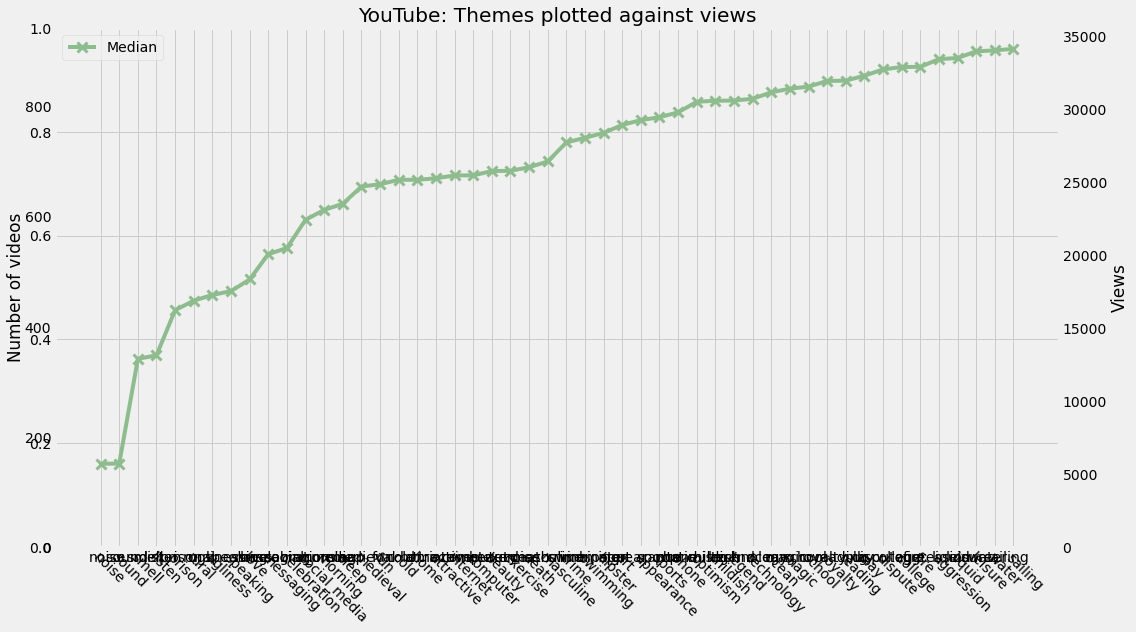

In [21]:
# Run this cell every time you want a new chart
print("The show(s) chosen for this visualisation:",list(show.value))
# Large Plot
matplotlib.rcParams['figure.figsize'] = (16.0, 9.0)
# Use ggplot style
style.use('fivethirtyeight')

def pick_frame(frame):
    if list(show.value) != ['All']:
        frame = frame.loc[frame['show'].str.contains('|'.join(show.value),case=False, regex=True)]
    if list(lang.value) != ['All']:
        frame = frame.loc[frame['lang'].str.contains('|'.join(lang.value),case=False, regex=True)]
    if list(emot.value) != ['All']:
        frame = frame.loc[frame['Top_Emotion'].str.contains('|'.join(emot.value),case=False, regex=True)]
    if list(brand.value) != ['All']:
        frame = frame.loc[frame['brand'].str.contains('|'.join(brand.value),case=False, regex=True)]
    if list(channel.value) != ['All']:
        frame = frame.loc[frame['channel_display_name'].str.contains('|'.join(channel.value),case=False, regex=True)]
    if list(cluster.value) != ['All']:
        frame = frame.loc[frame['cluster'].str.contains('|'.join(cluster.value),case=False, regex=True)]
    return frame

if dataset.value == 'YouTube':
    frame = fr2.copy()
    frame = pick_frame(frame)
    frame['tags_desc'].replace(regex=True,inplace=True,to_replace=r'wedding',value=r'')
    vis(frame, plot.value, avg, plot_rel.value, dataset.value, ascending.value )
elif dataset.value == 'Wildbrain':
    frame = fr2_Wildbrain.copy()
    frame = pick_frame(frame)
    frame['tags_desc'].replace(regex=True,inplace=True,to_replace=r'wedding',value=r'')
    vis(frame, plot.value, avg, plot_rel.value, dataset.value, ascending.value )
elif dataset.value == 'YT and Wildbrain':
    frame = fr2_Wildbrain.copy().append(fr2.copy())
    frame = pick_frame(frame)
    frame['tags_desc'].replace(regex=True,inplace=True,to_replace=r'wedding',value=r'')
    vis(frame, plot.value, avg, plot_rel.value, dataset.value, ascending.value )        
elif dataset.value == 'Web':
    frame = fr2_web.copy().loc[fr2_web['tags_desc'].str.len() != 0]
    frame = pick_frame(frame)
    frame['tags_desc'].replace(regex=True,inplace=True,to_replace=r'wedding',value=r'')
    vis(frame, plot.value, avg, plot_rel.value, dataset.value )
# elif dataset.value == 'HBO':
#     frame = fr2_HBO.copy()
#     frame = pick_frame(frame)
#     vis_HBO(frame, plot.value, avg, plot_rel.value, dataset.value )
# elif dataset.value == 'HBO-Toonix':
#     frame = fr2_HBO_Toonix.copy()
#     frame = pick_frame(frame)
#     vis(frame, plot.value, avg, plot_rel.value, dataset.value )
elif dataset.value == 'Linear':
    frame = fr2_Linear.copy()
    frame = pick_frame(frame)
    vis(frame, plot.value, avg, plot_rel.value, dataset.value, ascending.value )
elif dataset.value == 'Adult Swim':
    frame = fr2_AS.copy()
    frame = pick_frame(frame)
    frame['tags_desc'].replace(regex=True,inplace=True,to_replace=r'wedding',value=r'')
    vis_HBO(frame, plot.value, avg, plot_rel.value, dataset.value )
elif dataset.value == 'Boing':
    frame = fr2_boing.copy()
    frame = pick_frame(frame)
    frame['tags_desc'].replace(regex=True,inplace=True,to_replace=r'wedding',value=r'')
    vis(frame, plot.value, avg.value, plot_rel.value, dataset.value )

In [ ]:
# vis(frame, plot, avg, plot_rel, dataset, ascending)

In [13]:
plot.value

'Themes'

In [16]:
avg.value

'Median views'

In [18]:
plot_rel.value

'No'

In [19]:
dataset.value

'YouTube'

## Search

---

This allows you to search for 

- terms in the english translation of the Description, this will find matches of the search term and also search for similar terms.

- terms in the tags, these are a set of topics derived from the description. This searches for an exact match of the term (case-insensitive). You can input a list of tags to search for more than just one.



In [7]:
# Run this cell once


def synonym(word):
    synonyms = []

    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())


    return list(set(synonyms))

def search(value,df, toggle):
    if value == '':
        if df.shape[0] < 25:
            return df, df.shape[0]
        return df[:], df.shape[0]
    #tempdf = df.dropna(subset = ["show"])
    df_out = pd.DataFrame({'video_id': [], 'Stripped_Desc': [], 'Translated_Title': [],'topics':[],'views':[]})
    if toggle == 'Descriptions':
        x = []
        for i in value.split():
            x.extend(synonym(i) + synonym(p.plural(i)))
        if x == []:
            df_out = df.loc[df['Stripped_Desc'].str.contains(value, case=False, na=False)]
        else:
            reg = ' | '.join(x)
            reg = ' ' + reg
            df_out = df.loc[df['Stripped_Desc'].str.contains(reg, regex=True, case=False, na=False)]
            
    if toggle == 'Tags':
        x = value.split(' ')

        reg = ' | '.join(x)

        df_out = df.loc[df['tags_desc'].str.contains(' ' + reg, regex=True, case=False, na=False)]
        
        
    if df_out.shape[0] < 25:
        return df_out, df_out.shape[0]
    return df_out[:], df_out.shape[0]

srch_toggle = widgets.Dropdown(
    options=['Descriptions', 'Tags'],
    description='Search:',
    disabled=False,
)

srch = widgets.Text(
    value='',
    placeholder='Type something',
    description='Search:',
    disabled=False
)

Graph_sel = widgets.Dropdown(
    options=['Yes', 'No'],
    description='Search all?:',
    disabled=False,
)
brkdwn = widgets.Dropdown(
    options=['Yes', 'No'],
    description='Breakdown?:',
    disabled=False,
)


display(srch_toggle)
display(Graph_sel)
display(srch)
display(brkdwn)

Dropdown(description='Search:', options=('Descriptions', 'Tags'), value='Descriptions')

Dropdown(description='Search all?:', options=('Yes', 'No'), value='Yes')

Text(value='', description='Search:', placeholder='Type something')

Dropdown(description='Breakdown?:', options=('Yes', 'No'), value='Yes')

In [9]:
# Run this cell to get a new view of the dataset
import webbrowser
def make_clickable(link):
    # target _blank to open new window
    # extract clickable text to display for your link
    text = link.split('=')[1]
    return f'<a target="_blank" href="{link}">{text}</a>'

def make_clickable_web(text):
    # target _blank to open new window
    # extract clickable text to display for your link
    link = "https://www.dropbox.com/home/Video%20Assets/"
    return f'<a target="_blank" href="{link + str(text)}">{str(text).split("/C_")[-1]}</a>'

def make_clickable_hbo(text):
    # target _blank to open new window
    # extract clickable text to display for your link
    link = "https://www.imdb.com/title/tt"
    return f'<a target="_blank" href="{link + str(text)}">{str(text)}</a>'

if dataset.value == 'YouTube':
    frame = fr2.copy()
    frame['tags_desc'].replace(regex=True,inplace=True,to_replace=r'wedding',value=r'')
    frame = frame.sort_values(by = 'views', ascending=False)  #
    frame['Link'] = frame['video_id'].apply(lambda x: "https://www.youtube.com/watch?v=" + x)
    frame['Clickable'] = frame['Link'].apply(make_clickable)
    frame = frame[['Translated_Title','Clickable','Link', 'video_id', 'Stripped_Desc', 'tags_desc', 'channel_display_name', 'show', 'lang', 'time_published', 'cluster', 'views', 'Top_Emotion', 'brand']]
elif dataset.value == 'Wildbrain':
    frame = fr2_Wildbrain.copy()
    frame['tags_desc'].replace(regex=True,inplace=True,to_replace=r'wedding',value=r'')
    frame = frame.sort_values(by = 'views', ascending=False)  #
    frame['Link'] = frame['video_id'].apply(lambda x: "https://www.youtube.com/watch?v=" + x)
    frame['Clickable'] = frame['Link'].apply(make_clickable)
    frame = frame[['Translated_Title','Clickable','Link', 'video_id', 'Stripped_Desc', 'tags_desc', 'channel_display_name', 'show', 'lang', 'time_published', 'cluster', 'views', 'Top_Emotion', 'brand']]
elif dataset.value == 'YT and Wildbrain':
    frame = fr2_Wildbrain.copy().append(fr2.copy())
    frame['tags_desc'].replace(regex=True,inplace=True,to_replace=r'wedding',value=r'')
    frame = frame.sort_values(by = 'views', ascending=False)  #
    frame['Link'] = frame['video_id'].apply(lambda x: "https://www.youtube.com/watch?v=" + x)
    frame['Clickable'] = frame['Link'].apply(make_clickable)
    frame = frame[['Translated_Title','Clickable','Link', 'video_id', 'Stripped_Desc', 'tags_desc', 'channel_display_name', 'show', 'lang', 'time_published', 'cluster', 'views', 'Top_Emotion', 'brand']]
elif dataset.value == 'Web':
    frame = fr2_web.copy()
    frame['tags_desc'].replace(regex=True,inplace=True,to_replace=r'wedding',value=r'')
    frame['Link'] = frame['Dropbox link'].apply(make_clickable_web)
    frame = frame[['Translated_Title','Link' , 'video_id', 'Stripped_Desc', 'tags_desc', 'channel_display_name', 'show', 'lang', 'cluster', 'views', 'Top_Emotion']]
# elif dataset.value == 'HBO':
#     frame = fr2_HBO.copy()
#     frame['Link'] = frame['Episode Code'].apply(make_clickable_hbo)
#     frame = frame[['Translated_Title','Link', 'video_id', 'Stripped_Desc', 'tags_desc', 'channel_display_name', 'show', 'lang', 'cluster', 'Episode Rating', 'Top_Emotion']]
#     frame = frame.sort_values(by = 'Episode Rating', ascending=False)
# elif dataset.value == 'HBO-Toonix':
#     frame = fr2_HBO_Toonix.copy()
#     frame['Link'] = frame['Episode Code'].apply(make_clickable_hbo)
#     frame = frame[['Episode Title','show','Link' , 'Episode Code', 'Episode Plot Synopsis', 'tags_desc', 'channel_display_name', 'lang', 'cluster', 'views', 'Top_Emotion', 'brand', 'cluster']]
#     frame = frame.sort_values(by = 'views', ascending=False)
elif dataset.value == 'Linear':
    frame = fr2_Linear.copy()
    frame['tags_desc'].replace(regex=True,inplace=True,to_replace=r'wedding',value=r'')
    frame = frame[['Translated_Title', 'video_id', 'eidr_id', 'international_id', 'Stripped_Desc', 'tags_desc', 'channel_display_name', 'show', 'lang', 'cluster', 'views', 'Top_Emotion']]
    frame = frame.sort_values(by = 'views', ascending=False)
elif dataset.value == 'AS':
    frame = fr2_AS.copy()
    frame['tags_desc'].replace(regex=True,inplace=True,to_replace=r'wedding',value=r'')
    frame['Link'] = frame['Episode Code'].apply(make_clickable_hbo)
    frame = frame[['Translated_Title','Link', 'video_id', 'Stripped_Desc', 'tags_desc', 'channel_display_name', 'show', 'lang', 'cluster', 'Episode Rating', 'Top_Emotion']]
    frame = frame.sort_values(by = 'Episode Rating', ascending=False)    
elif dataset.value == 'Boing':
    frame = fr2_boing.copy()
    frame['tags_desc'].replace(regex=True,inplace=True,to_replace=r'wedding',value=r'')
    frame['video_id'] = frame['Episode Code']
    frame = frame[['Episode Title', 'video_id', 'Episode Plot Synopsis', 'tags_desc', 'show', 'lang', 'cluster', 'views', 'Top_Emotion']]
    frame = frame.sort_values(by = 'views', ascending=False)      
    
    
if Graph_sel.value == 'No':
    if list(show.value) != ['All']:
        frame = frame.loc[frame['show'].str.contains('|'.join(show.value),case=False, regex=True)]
    if list(lang.value) != ['All']:
        frame = frame.loc[frame['lang'].str.contains('|'.join(lang.value),case=False, regex=True)]
    if list(emot.value) != ['All']:
        frame = frame.loc[frame['Top_Emotion'].str.contains('|'.join(emot.value),case=False, regex=True)]
    if list(brand.value) != ['All']:
        frame = frame.loc[frame['brand'].str.contains('|'.join(brand.value),case=False, regex=True)]
    if list(channel.value) != ['All']:
        frame = frame.loc[frame['channel_display_name'].str.contains('|'.join(channel.value),case=False, regex=True)]

fr_sh, size = search(srch.value, frame, srch_toggle.value)

df = fr_sh[:100].to_html(escape=False, index=False)

download = widgets.Button(description='Download data as csv')
display(download)
print('Number of videos in selection: ' + str(size))
display(HTML(df))

#if brkdwn.value == 'Yes' and size > 0:
#    if dataset.value == 'YouTube' or dataset.value == 'Linear': 
#        vis(fr_sh, plot='Tag Cluster', avg = 'Median', plot_rel = plot_rel.value, dataset = dataset.value )
#    elif dataset.value == 'HBO':
#        vis_HBO(fr_sh, plot='Tag Cluster', avg = 'Median', plot_rel = plot_rel.value)
from datetime import datetime
        
def on_button_download_clicked(d):

    fr_sh.to_csv(datetime.now().strftime("%d%m%Y_%H%M%S") + '.csv')
    #url = 'file:///data.csv'
    #webbrowser.open(url)

download.on_click(on_button_download_clicked)



Button(description='Download data as csv', style=ButtonStyle())

Number of videos in selection: 352


Translated_Title,Clickable,Link,video_id,Stripped_Desc,tags_desc,channel_display_name,show,lang,time_published,cluster,views,Top_Emotion,brand
I am on the road | The Amazing World of Gumball | cartoon Network,RRpgYk4sJUQ,https://www.youtube.com/watch?v=RRpgYk4sJUQ,RRpgYk4sJUQ,"Darwin sings ""I'm in the way,"" the intensity of his joy to return to Elmore",cheerfulness aggression anticipation optimism childish surprise love music rage joy anger giving contentment positive_emotion,Cartoon Network MENA,the amazing world of gumball,ar,2016/02/28 03:02:00,No cluster Yet,20585222,joy,No Brand Yet
Cat Lady | Teen Titans Go | Cartoon Network,w11uHGFLbLI,https://www.youtube.com/watch?v=w11uHGFLbLI,w11uHGFLbLI,Star has become a cat lady and Robin is pretending to be a cat to finally get some affection from Star. When the Robin realizes she has gone too far with her cat craze he pretends to be a dog instead to get her to forget the cats.,pet love joy affection traveling animal contentment positive_emotion,Cartoon Network Africa,teen titans go,en,2016/07/31 00:00:02,No cluster Yet,19295941,joy,No Brand Yet
The emergence of Alooumnitricks | Ben 10 classic | cartoon Network,rOxpEa7gAKQ,https://www.youtube.com/watch?v=rOxpEa7gAKQ,rOxpEa7gAKQ,This is the first meeting between Ben Tnesn and a Aloomntricks. It's a long relationship and full of excitement and adventures start. But you must first be aware that the use of Alooumnitricks represents responsibility is as much fun.,cheerfulness anticipation vacation leisure play optimism childish surprise celebration toy youth fun joy party friends children contentment positive_emotion,Cartoon Network MENA,ben 10,ar,2013/06/02 07:43:22,No cluster Yet,9350645,joy,No Brand Yet
Tom and Jerry | Rat cop | Boomerang,04uYwOd-xtA,https://www.youtube.com/watch?v=04uYwOd-xtA,04uYwOd-xtA,"Tom is using a new product called ""rat cop"" to try to catch Jerry and earn the gratitude of the family!",domestic_work cheerfulness family crime prison leisure stealing home driving surprise movement celebration love shopping joy fashion animal party achievement children giving contentment positive_emotion,Boomerang România,tom and jerry,ro,2018/10/20 07:00:00,No cluster Yet,7784037,joy,No Brand Yet
Fireman Sam | Froggy Spectacular | Cartoonito,y8wpVDMftmE,https://www.youtube.com/watch?v=y8wpVDMftmE,y8wpVDMftmE,The children of Pontypandy are going to perform a special show at the lido - dressed at frogs. James will be finishing off the froggy spectacular by jumping from the diving board - and Norman's feeling quite jealous about it.,dance hate envy feminine exercise optimism fear water celebration swimming air_travel music sailing sadness joy affection fashion party beauty ocean contentment positive_emotion musical,Cartoonito UK,fireman sam,en,2017/01/23 09:00:07,No cluster Yet,4407367,joy,No Brand Yet
Teen Titans Go! | Beauty Pageant Raven | Cartoon Network UK 🇬🇧,LShsO-Zm3QU,https://www.youtube.com/watch?v=LShsO-Zm3QU,LShsO-Zm3QU,"Raven enters a beauty pageant in order to win back her father's affection, but learning the moves is much harder than she thought.",attractive school play college reading restaurant love fight science fun joy affection strength beauty competing achievement giving contentment positive_emotion,Cartoon Network UK,teen titans go,en,2019/10/17 08:00:06,No cluster Yet,3529617,joy,No Brand Yet
Ben 10 | Hold on Tight | Cartoon Network,4-1HQFop3sA,https://www.youtube.com/watch?v=4-1HQFop3sA,4-1HQFop3sA,Ben is feeling a little sea sick.,medical_emergency hate health beach optimism fear childish water swimming sadness joy affection ship negative_emotion children ocean contentment positive_emotion,Cartoon Network UK,ben 10,en,2017/12/24 08:00:00,No cluster Yet,2868150,sadness,No Brand Yet
The Amazing World of Gumball | A Bump to the Head | Cartoon Network,jEzwrkxIH0g,https://www.youtube.com/watch?v=jEzwrkxIH0g,jEzwrkxIH0g,Gumball isn't feeling very well...,hate optimism fear sadness joy affection contentment po

### Tags
Find out what words are associated with what tags using the search box below

In [ ]:
#Run this cell once
srch_empath = widgets.Text(
    value='',
    placeholder='Type something',
    description='Enter word:',
    disabled=False
)
display(srch_empath)

In [ ]:
# Run this to discover what topics are associated with a word
def tpc(word):
    

    emp = lexicon.analyze(word, categories = categories)
    return [k for k,v in emp.items() if v != 0]
print(tpc(srch_empath.value))

In [ ]:
tags = lexicon.analyze('''Nine noble families wage war against each other in 
    order to gain control over the mythical land of Westeros. Meanwhile, 
    a force is rising after millenniums and threatens 
    the existence of living men.''',
                       normalize=False)
tags

In [ ]:
tags = sorted(tags, key = tags.get, reverse = True)[:10]
tags